In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import yfinance as yf
import matplotlib
import seaborn as sns
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=sns.color_palette("tab20", 11)) 
plt.rcParams.update({
   "text.usetex": True,
   "font.family": ['Latin Modern Roman'],
   "xtick.labelsize": 17.0,
   "ytick.labelsize": 17.0,
   "axes.labelsize":  17.0,
   "legend.fontsize": 17.0
})

In [4]:
t = 50
num_params = 2

In [5]:
alpha = [0.3414, 0.3414]
beta = [0, 0.6586]

In [6]:
cond_var = lambda omega, alpha, epsilon, beta, sigma: omega + alpha*epsilon**2 + beta*sigma

In [7]:

epsilon = np.full((t), 0)
epsilon[int(t/2)] = 8

In [8]:
#omega = np.linspace(1.5, 0.05, num_params)
omega = [1.5174, 0.5]
#omega = [1, 1]
sigma_t = [[1]*len(alpha)]

In [9]:
for i, e in enumerate(epsilon):
    tmp = []
    for j, (a, b, o) in enumerate(zip(alpha, beta, omega)):
        tmp.append(cond_var(o, a, e, b, sigma_t[i][j]))
    sigma_t.append(tmp)

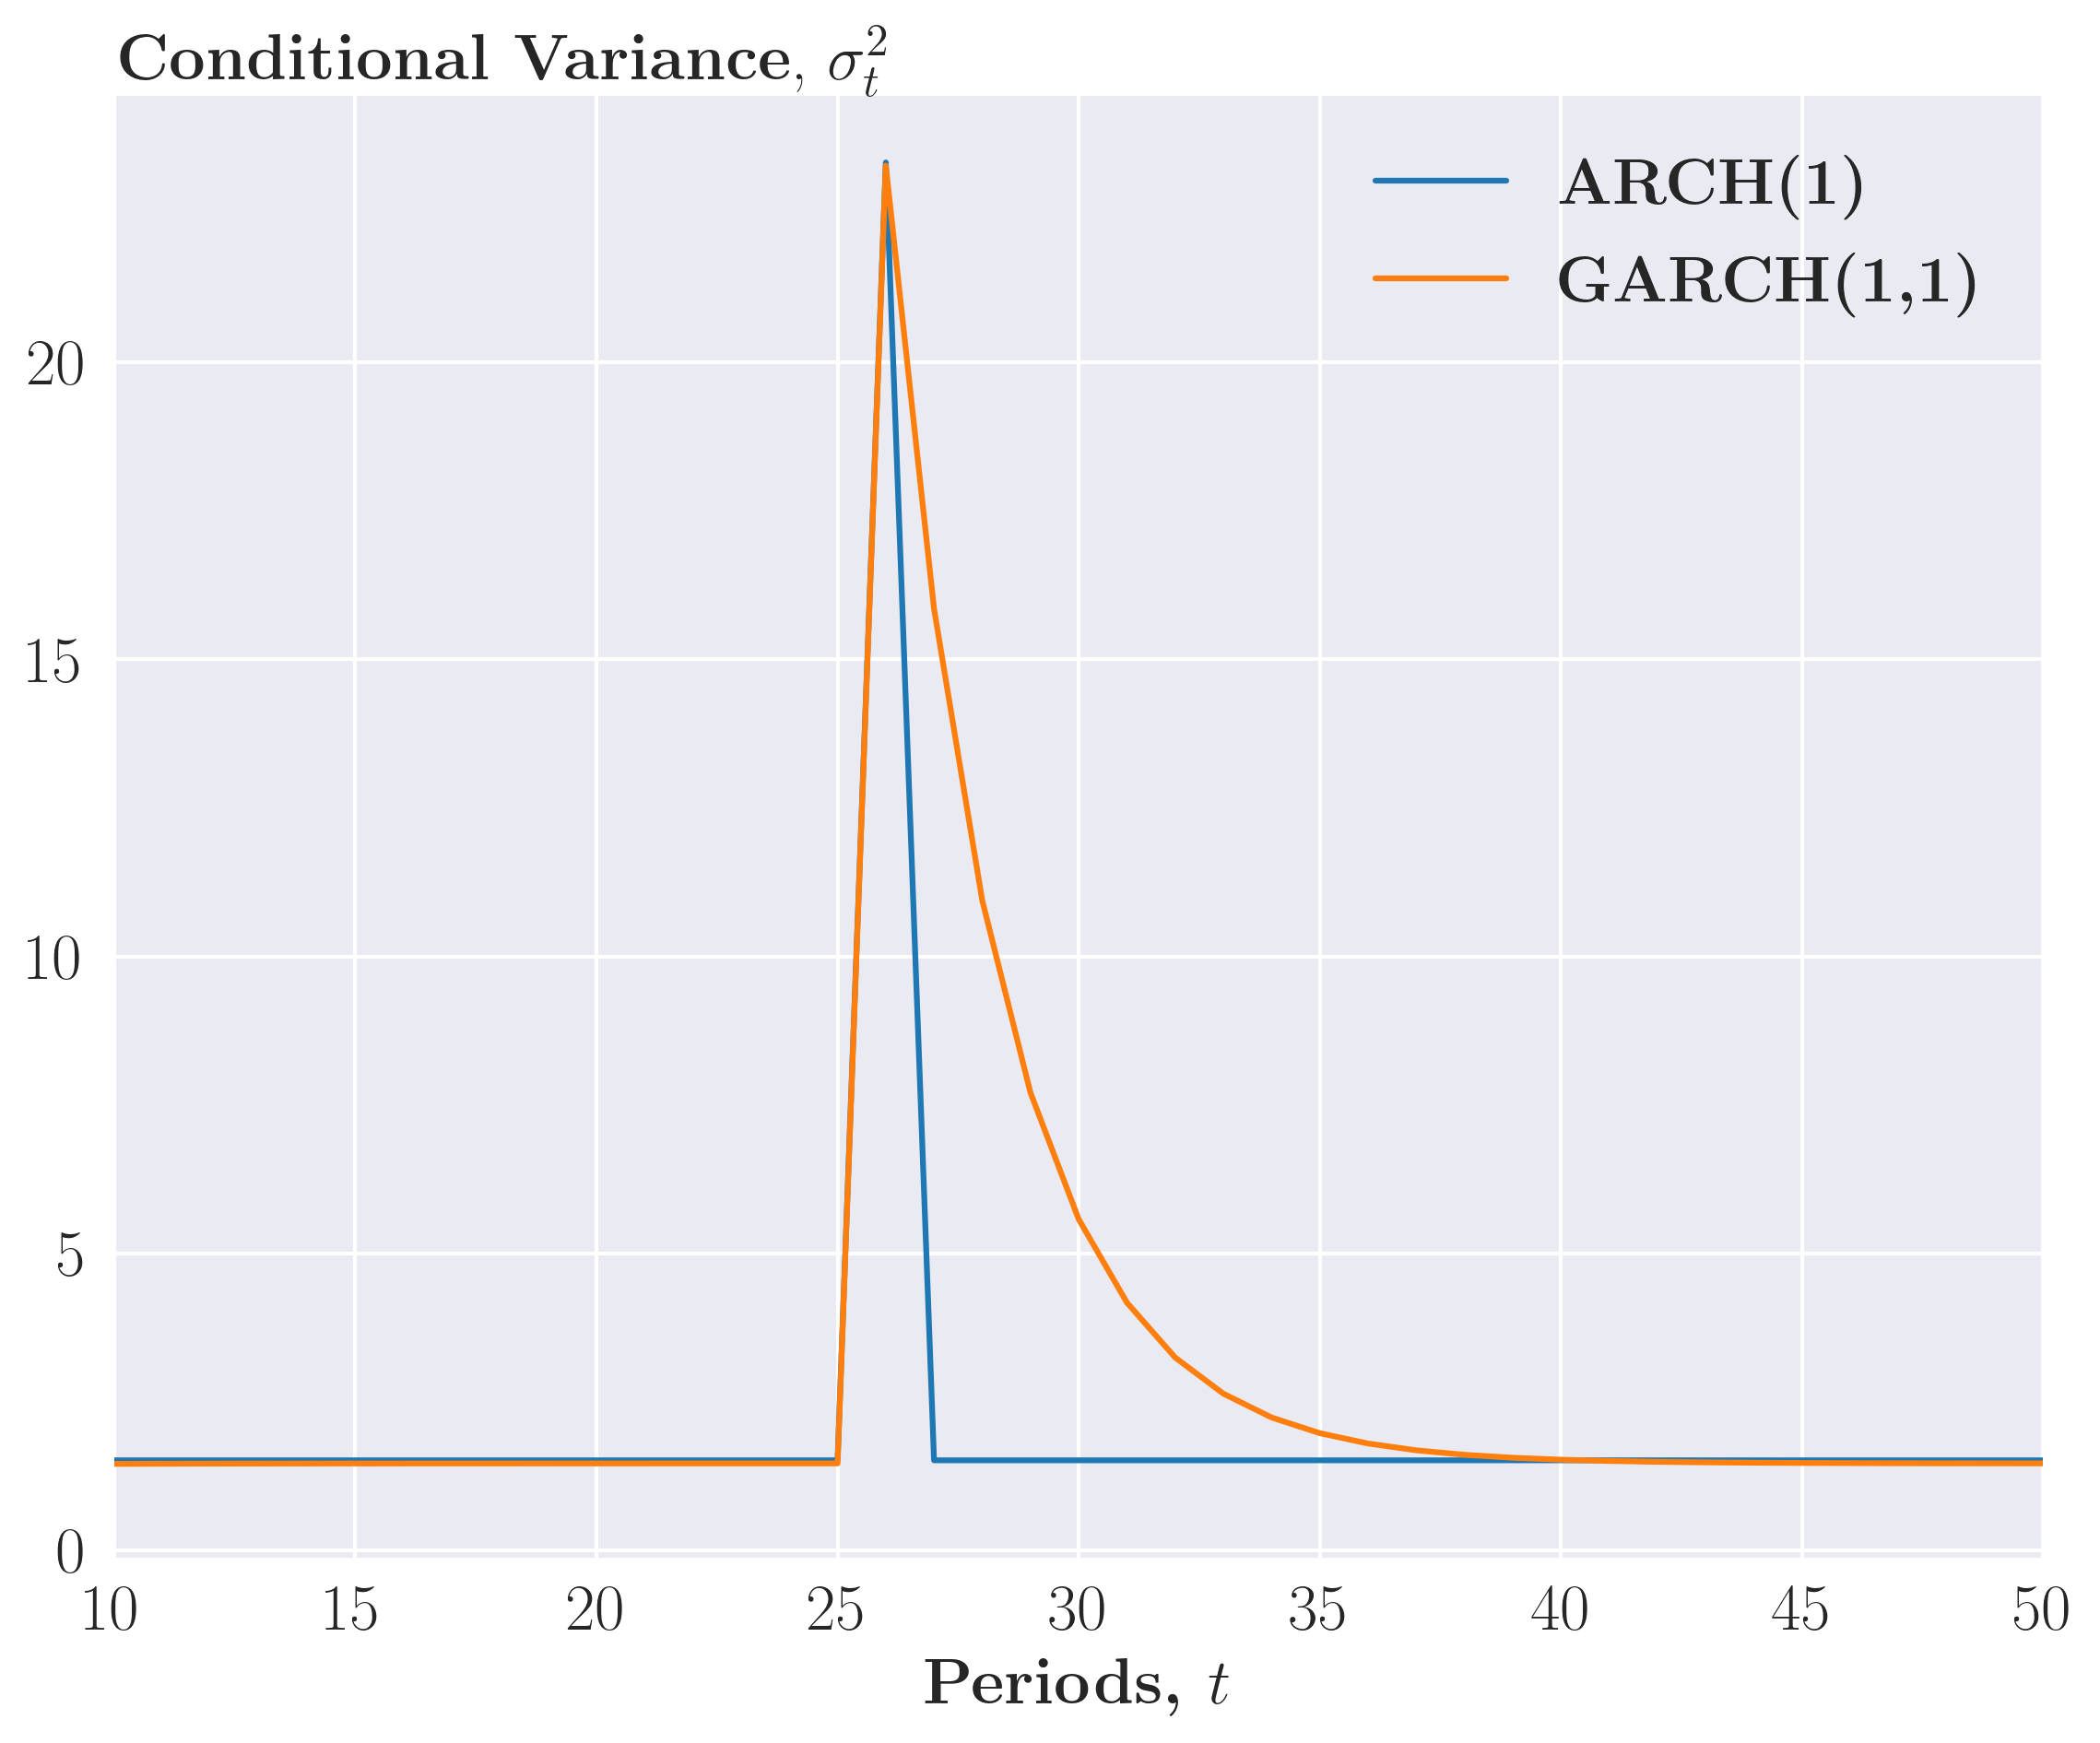

In [10]:
#Omdanner til np.array
sigma=np.array(sigma_t)
#Laver figur
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=300)
ax.plot(sigma[:,0], linewidth = 1.5,label=r"\textbf{ARCH(1)}",c=sns.color_palette("tab20")[0])
ax.plot(sigma[:,1], linewidth = 1.5,label=r"\textbf{GARCH(1,1)}",c=sns.color_palette("tab20")[2])
ax.set_xlabel(r"\textbf{Periods, $t$}")
ax.set_ylabel(r"\textbf{Conditional Variance}, $\sigma^2_t$",loc='top', rotation = 0, labelpad = -225)
ax.set_xlim(xmin=10)
ax.set_xlim(xmax=50)
plt.legend()
fig.savefig('irf_(G)ARCH.png', bbox_inches="tight")